In [1]:
import numpy as np
import sys, os
%matplotlib notebook
import matplotlib.pyplot as plt
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'])
sys.path.append(os.environ['rapp'])
from rayleigh_diagnostics import Shell_Slices
from common import *
import spectral_utils as su

In [9]:
dirname = '.'
datadir = dirname + '/data/'
the_file = get_widest_range_file(datadir, 'AZ_Avgs')
print ('reading ' + the_file)
di = get_dict(the_file)
vals = di['vals']
lut = di['lut']
np.shape(vals)

reading ./data/AZ_Avgs-13652500_27350000.pkl


(384, 192, 294)

In [10]:
gi = get_grid_info(dirname)
rr = gi['rr']
nr = len(rr)
nphi = gi['nphi']
tw = gi['tw']
tw_2d = gi['tw_2d']
nt = len(tw)
tt_lat = gi['tt_lat']
print('nr =', nr)
print('nt =', nt)
print('nphi =', nphi)

nr = 192
nt = 384
nphi = 768


In [11]:
# indices associated with shell slices
a0 = Shell_Slices('16150000')
rinds = a0.rad_inds
print (rr[rinds]/rsun)

[0.71656272 0.70707956 0.6906394  0.66109085 0.63447754 0.6034544
 0.57752866 0.5476774  0.51833426 0.50226305]


<IPython.core.display.Javascript object>


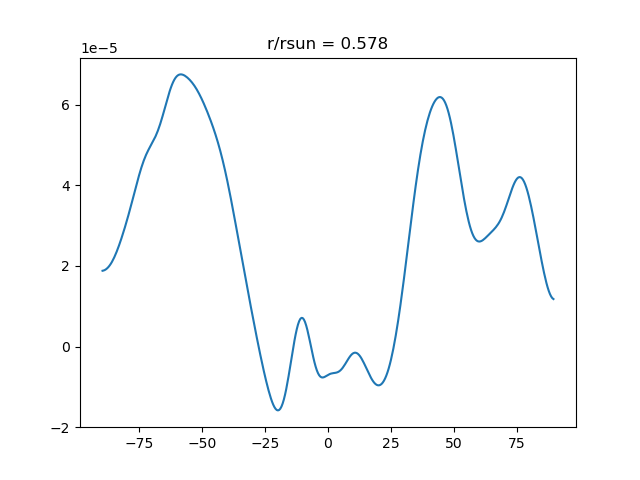

Text(0.5, 1.0, 'r/rsun = 0.578')

In [13]:
# prod Mag theta en. 
ir0 = 6

meprodt = vals[:, :, lut[2202]]
plt.figure()
plt.plot(tt_lat, meprodt[:, rinds[ir0]])
plt.title('r/rsun = %.3f' %(rr[rinds[ir0]]/rsun))

In [7]:
# read in time m spectra from shell slices
print ('reading')

di_tspec = get_dict(get_widest_range_file(datadir + '/tmspec/', 'tmspec_qval3002_irval%02i' %ir0))
mvals = di_tspec['mvals']
freq = di_tspec['freq']
indt = di_tspec['vals']

print ('reading')
bt = get_dict(get_widest_range_file(datadir + '/tmspec/','tmspec_qval0802_irval%02i' %ir0))['vals']

print (np.shape(bt))

reading
reading
(13700, 256, 384)


In [14]:
# get the production by summing over frequency and m
ntimes, nm, nt = np.shape(bt)
def summ(arr):
    return arr[0,...] + 2*np.sum(arr[1:,...],axis=0)
meprodt_spec = np.real(np.conjugate(bt)*indt)/9/(ntimes*nm)**2
meprodt_spec_tot = summ(np.sum(meprodt_spec,axis=0))

<IPython.core.display.Javascript object>


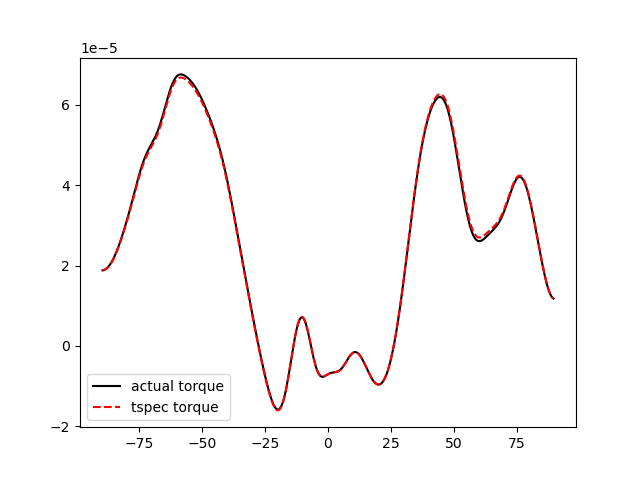

In [15]:
plt.figure()
plt.plot(tt_lat, meprodt[:, rinds[ir0]], 'k', label='actual torque')
plt.plot(tt_lat, meprodt_spec_tot, 'r--', label='tspec torque')
plt.legend()

In [16]:
# nice! Now figure out how much production comes from different m modes
# "prod[1:nfreq, 1:nm, 1:ntheta]" represents the production at theta coming from different
# freq, m components

In [17]:
meprodt_spec_m = np.sum(meprodt_spec, axis=0)
meprodt_spec_m[1:, :] *= 2
meprodt_spec_freq = np.zeros((ntimes, nt))
for ifreq in range(ntimes):
    meprodt_spec_freq[ifreq, ...] = summ(meprodt_spec[ifreq, ...])

In [18]:
print (np.shape(meprodt_spec_m))
print (np.shape(meprodt_spec_freq))

(256, 384)
(13700, 384)


In [21]:
# get the total meprod to "normalize" things by
meprodt_nd = meprodt[:, rinds[ir0]].reshape((1, nt))

In [22]:
# OK, now plot the torque contributions from low m
# check normalizations first
print (np.mean(np.sum(meprodt_spec_m/meprodt_nd, axis=0)))
print (np.std(np.sum(meprodt_spec_m/meprodt_nd, axis=0)))
print (np.mean(np.sum(meprodt_spec_freq/meprodt_nd, axis=0)))
print (np.std(np.sum(meprodt_spec_freq/meprodt_nd, axis=0)))

1.0045291332711128
0.072233003479493
1.0045291332711126
0.0722330034794984


In [23]:
#OK good
print (np.shape(meprodt_nd))

(1, 384)


In [24]:
# plot stuff
sys.path.append(os.environ['rapl'] + '/slice')
from slice_util import spec_2D_fig_dimensions
from plotcommon import *

kw_my_pcolormesh = dotdict(dict(my_pcolormesh_kwargs_default))
#kw_my_pcolormesh['logscale'] = False
#kw_my_pcolormesh['posdef'] = False

kw_make_figure = dotdict(dict(make_figure_kwargs_default))
spec_2D_fig_dimensions['sub_margin_top_inches'] = 3/4
kw_make_figure.update(spec_2D_fig_dimensions)

<IPython.core.display.Javascript object>


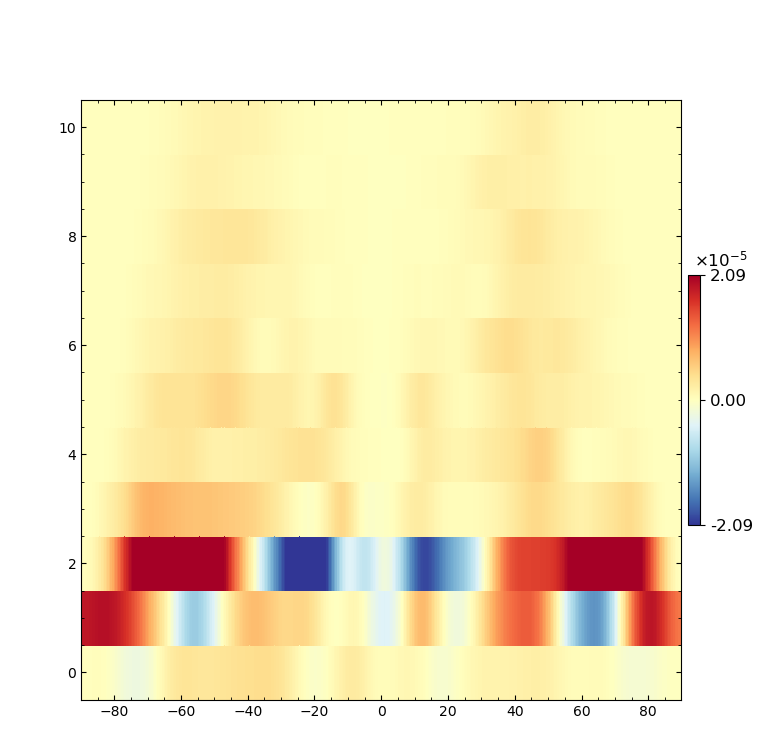

In [26]:
# plot meprod fraction distributed across m and lat.
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]
kw_my_pcolormesh.cbar_pos = 'right'
kw_my_pcolormesh.x = tt_lat
kw_my_pcolormesh.y = mvals
kw_my_pcolormesh.ymax = 10
mmin, mmax = my_pcolormesh((meprodt_spec_m).T, fig, ax, **kw_my_pcolormesh)

<IPython.core.display.Javascript object>


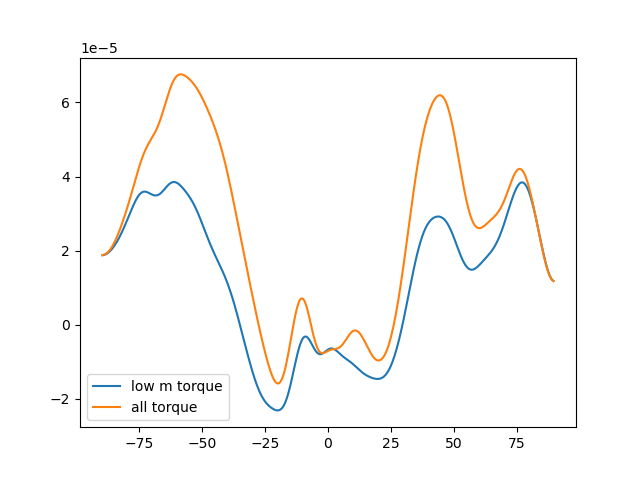

In [35]:
# wow low m torque really seems like most of the meprod, let's see if that's true
mmin = 1
mmax = 2
plt.figure()
plt.plot(tt_lat, np.sum(meprodt_spec_m[mmin:mmax+1,:], axis=0), label='low m torque')
plt.plot(tt_lat, meprodt[:, rinds[ir0]], label='all torque')
plt.legend()

In [36]:
# seems like maybe half the production is of the m=1 and m=2 modes...good
# also prodution is mostly at high latitudes

In [37]:
# now let's do this for frequency

<IPython.core.display.Javascript object>


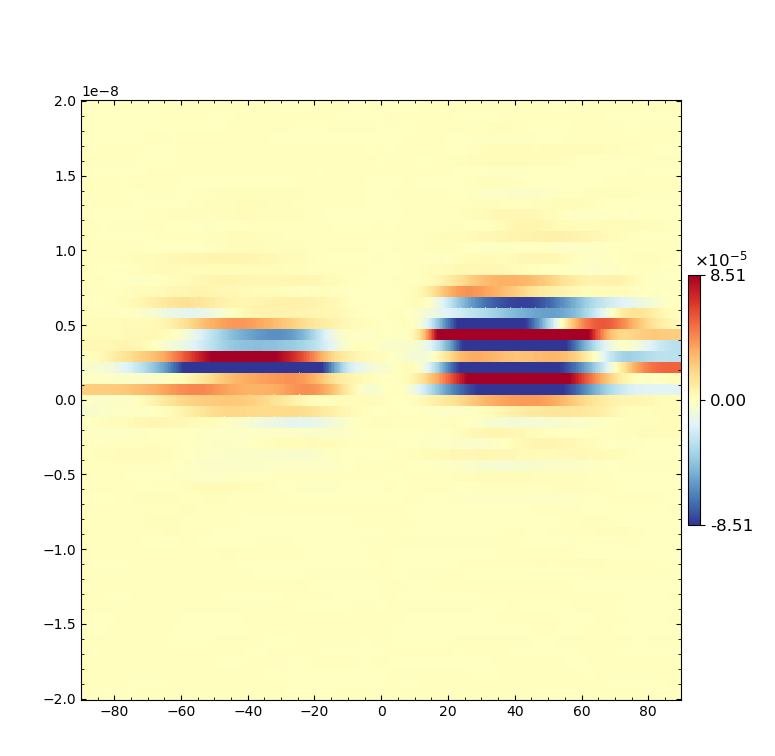

In [42]:
# plot me prod distributed across freq and lat.
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]
kw_my_pcolormesh.cbar_pos = 'right'
kw_my_pcolormesh.x = tt_lat
kw_my_pcolormesh.y = freq
kw_my_pcolormesh.ymin = -2e-8
kw_my_pcolormesh.ymax = 2e-8
mmin, mmax = my_pcolormesh((meprodt_spec_freq).T, fig, ax, **kw_my_pcolormesh)

In [43]:
# compute the differential rotation
diffrot = vals[:, :, lut[3]]/gi['xx']/(2*np.pi)*1e9

<IPython.core.display.Javascript object>


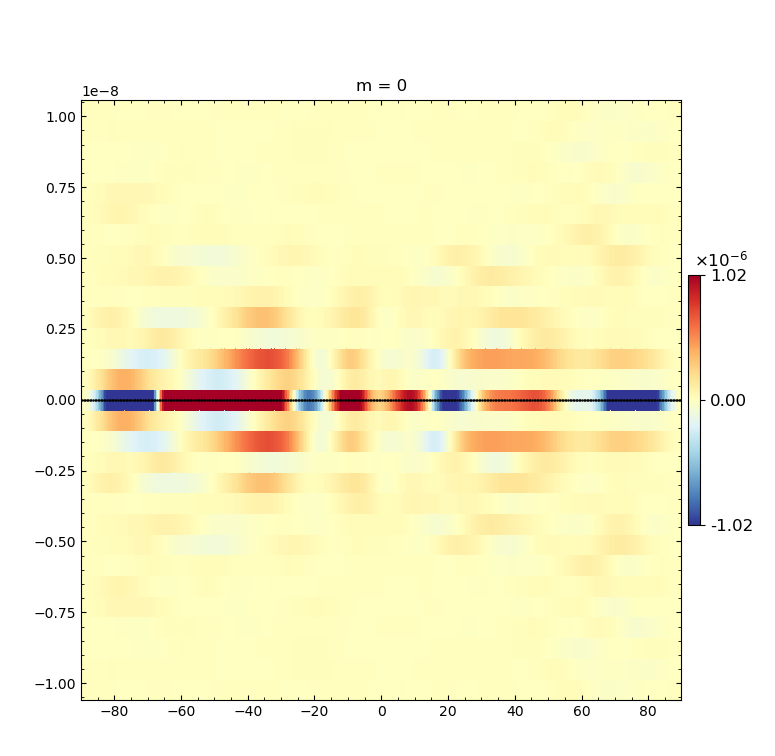

Text(0.5, 1.0, 'm = 0')

In [44]:
# plot torque fraction distributed across freq and lat.
mchoose = 0
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]
kw_my_pcolormesh.cbar_pos = 'right'
kw_my_pcolormesh.x = tt_lat
kw_my_pcolormesh.y = freq
kw_my_pcolormesh.ymin = -1e-8
kw_my_pcolormesh.ymax = 1e-8
mmin, mmax = my_pcolormesh((meprodt_spec[:, mchoose, :]).T, fig, ax, **kw_my_pcolormesh)

ax.scatter(tt_lat, -diffrot[:, rinds[ir0]]*1e-9*mchoose, color='k', s=.5)

plt.title('m = %i' %mchoose)

<IPython.core.display.Javascript object>


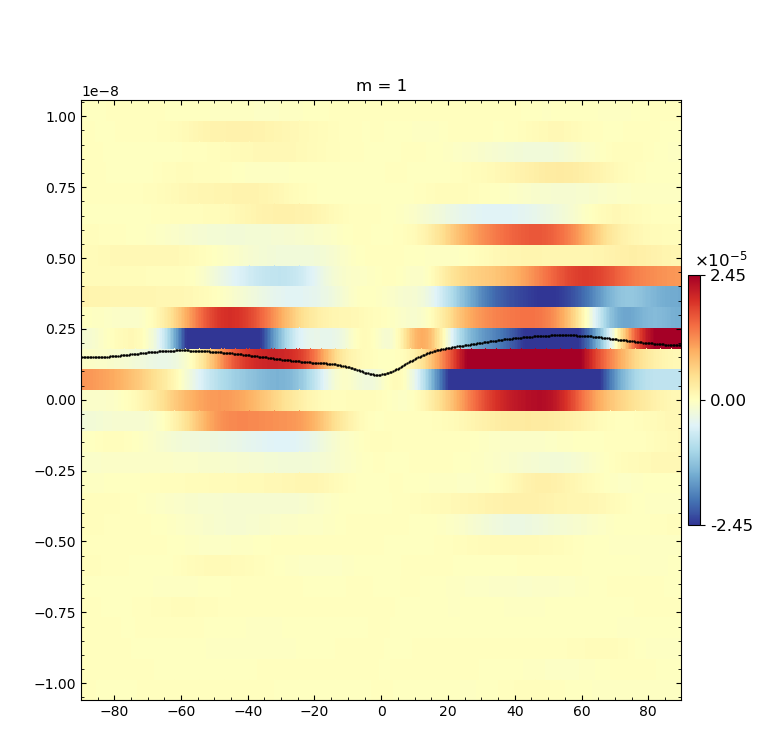

Text(0.5, 1.0, 'm = 1')

In [45]:
# plot torque fraction distributed across freq and lat.
mchoose = 1
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]
kw_my_pcolormesh.cbar_pos = 'right'
kw_my_pcolormesh.x = tt_lat
kw_my_pcolormesh.y = freq
kw_my_pcolormesh.ymin = -1e-8
kw_my_pcolormesh.ymax = 1e-8
mmin, mmax = my_pcolormesh((meprodt_spec[:, mchoose, :]).T, fig, ax, **kw_my_pcolormesh)

ax.scatter(tt_lat, -diffrot[:, rinds[ir0]]*1e-9*mchoose, color='k', s=.5)

plt.title('m = %i' %mchoose)

<IPython.core.display.Javascript object>


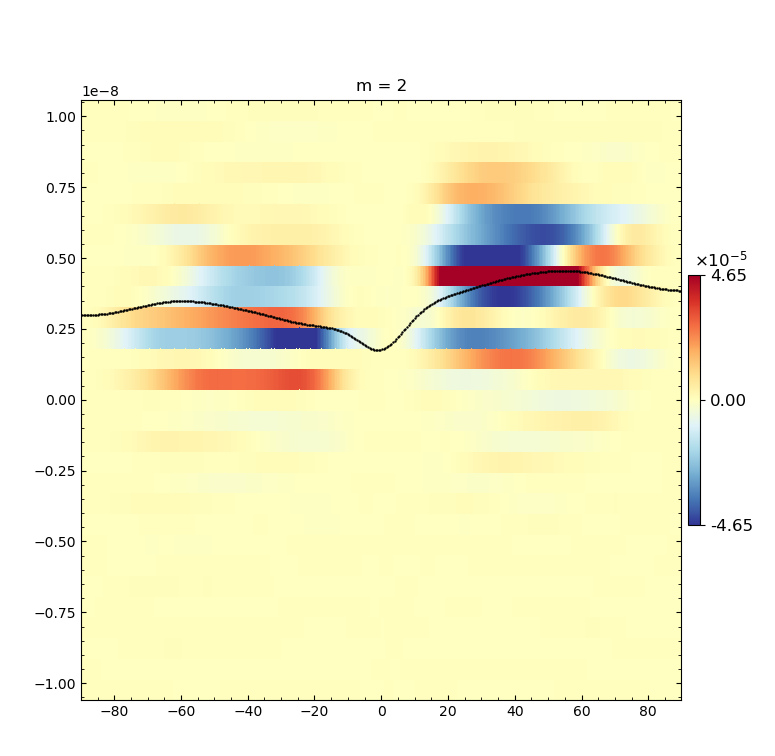

Text(0.5, 1.0, 'm = 2')

In [47]:
# plot torque fraction distributed across freq and lat.
mchoose = 2
fig, axs, fpar = make_figure(**kw_make_figure)
ax = axs[0, 0]
kw_my_pcolormesh.cbar_pos = 'right'
kw_my_pcolormesh.x = tt_lat
kw_my_pcolormesh.y = freq
kw_my_pcolormesh.ymin = -1e-8
kw_my_pcolormesh.ymax = 1e-8
mmin, mmax = my_pcolormesh((meprodt_spec[:, mchoose, :]).T, fig, ax, **kw_my_pcolormesh)

ax.scatter(tt_lat, -diffrot[:, rinds[ir0]]*1e-9*mchoose, color='k', s=.5)

plt.title('m = %i' %mchoose)

In [48]:
# huh... this is a bit hard to interpret...low frequencies involved in energy production, 
# but not for all the frequencies?
# I feel like I now know: energy is getting produced inductively for m = 1, 2 (which is what we care about!)
# don't know which modes are producing the specific frequency components